## Python statistics essential training - 04_06_challenge

Standard imports

In [9]:
import math
import io

In [10]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [12]:
pop = pd.read_csv('grades.csv')

Using bootstrapping on polling data for mayor green's grades estimate the confidence interval for the fraction of citizens that give her a grade > 5. (THE confidence interval is nonsensical. do it for 95%)

Confidence interval for the FRACTION of citizens that gave grade > 5. This means the answer should be something like 50 +- x%. 
Therefore the bootstrapping sampling should take samples, then find the fraction with scores > 5. This will create a distribution of fractions > 5 which we can find the confidence interval of. 

In [17]:
pop.shape

(100, 1)

In [70]:
pop.sample(100, replace=True).index.sort_values()

Int64Index([ 1,  1,  2,  2,  4,  4,  4,  4,  6,  8,  8,  8,  8,  9, 10, 10, 11,
            11, 11, 14, 17, 17, 18, 18, 20, 22, 22, 23, 26, 26, 26, 27, 27, 28,
            28, 29, 30, 33, 33, 35, 35, 36, 37, 39, 40, 41, 42, 44, 44, 47, 47,
            47, 48, 48, 48, 49, 49, 50, 50, 52, 57, 57, 57, 58, 58, 59, 64, 66,
            66, 66, 67, 68, 69, 70, 71, 73, 73, 75, 79, 80, 83, 83, 84, 84, 84,
            85, 86, 86, 88, 88, 91, 91, 93, 93, 95, 96, 96, 98, 99, 99],
           dtype='int64')

In [43]:
scipy.stats.percentileofscore(pop.sample(100, replace=True), score=5)

46.0

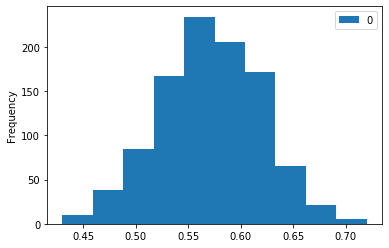

In [73]:
samplesize = 100
boots = pd.DataFrame([np.sum(pop.sample(samplesize,replace=True).values > 5)/samplesize for i in range(1000)])
boots.plot(kind='hist')
plt.show()

Find the confidence interval by fitting this distribution to a gaussian distribution

In [74]:
#norm, ttest_ind, ttest_rel
mean, std = scipy.stats.norm.fit(boots.values)

In [77]:
# Confidence interval
1-np.array(scipy.stats.norm.interval(0.95, loc=mean, scale=std))

array([0.52631084, 0.33172916])